In [3]:
from pydriller import Repository, Commit
import re
import mimetypes

In [4]:
def get_commits(repo: Repository) -> list[Commit]:
     return list(repo.traverse_commits())

def get_repo(repo_url: str) -> Repository:
     return Repository(repo_url)

def get_results(repo: Repository) -> dict:
     results = {
          "commits": [],
     }
     for commit in repo.traverse_commits():
          results["commits"].append(commit)
          for file in commit.modified_files:
               results["files"].append(file)
     return results

In [5]:
game_repos_url = [
    "https://github.com/veloren/veloren",
    "https://github.com/CleverRaven/Cataclysm-DDA",
    "https://github.com/00-Evan/shattered-pixel-dungeon",
    "https://github.com/Anuken/Mindustry",
    "https://github.com/crawl/crawl",
    "https://github.com/Warzone2100/warzone2100",
    "https://github.com/yairm210/Unciv",
    "https://github.com/OpenTTD/OpenTTD",
    "https://github.com/endless-sky/endless-sky",
    "https://github.com/wesnoth/wesnoth",
]

web_repos_url = [
    "https://github.com/lichess-org/lila",
    "https://github.com/flutter/website",
    "https://github.com/monkeytypegame/monkeytype",
    "https://github.com/reactjs/react.dev",
    "https://github.com/ethereum/ethereum-org-website",
    "https://github.com/kubernetes/website",
    "https://github.com/TheOdinProject/theodinproject",
    "https://github.com/tailwindlabs/tailwindcss.com",
    "https://github.com/bitwarden/clients",
    "https://github.com/privacyguides/privacyguides.org",
]

In [6]:
game_repos = []
for game_repo_url in game_repos_url:
    game_repos.append(get_repo(game_repo_url))

In [7]:
web_repos = []
for web_repo_url in web_repos_url:
    web_repos.append(get_repo(web_repo_url))

In [8]:
game_commits = []
for repo in game_repos:
    game_commits.append(get_commits(repo))

In [29]:
web_commits = []
for repo in web_repos:
    web_commits.append(get_commits(repo))

In [42]:
merge_commit_regex = re.compile(r"Merge .*?branch.*?(into)?.*")
game_merge_commits = list(map(lambda commits: list(filter(lambda commit: merge_commit_regex.match(commit.msg), commits)), game_commits))
web_merge_commits = list(map(lambda commits: list(filter(lambda commit: merge_commit_regex.match(commit.msg), commits)), web_commits))

In [73]:
import numpy as np
import matplotlib.pyplot as plt

game_merge_commits_counts = list(map(lambda commits: len(list(filter(lambda commit: merge_commit_regex.match(commit.msg), commits))), game_commits))
game_total_commits_counts = list(map(len, game_commits))

web_merge_commits_counts = list(map(lambda commits: len(list(filter(lambda commit: merge_commit_regex.match(commit.msg), commits))), web_commits))
web_total_commits_counts = list(map(len, web_commits))

np_game_commits = np.array(game_total_commits_counts)
np_game_merge_commits = np.array(game_merge_commits_counts)

np_web_commits = np.array(web_total_commits_counts)
np_web_merge_commits = np.array(web_merge_commits_counts)

game_merge_ratios = (np_game_merge_commits / np_game_commits) * 100
web_merge_ratios = (np_web_merge_commits / np_web_commits) * 100

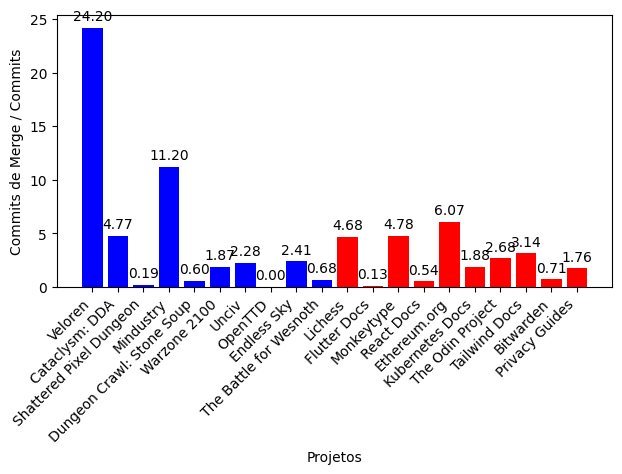

In [69]:
all_merge_ratios = np.concatenate((game_merge_ratios, web_merge_ratios))
game_projects = [
    "Veloren",
    "Cataclysm: DDA",
    "Shattered Pixel Dungeon",
    "Mindustry",
    "Dungeon Crawl: Stone Soup",
    "Warzone 2100",
    "Unciv",
    "OpenTTD",
    "Endless Sky",
    "The Battle for Wesnoth",
]
web_projects = [
    "Lichess",
    "Flutter Docs",
    "Monkeytype",
    "React Docs",
    "Ethereum.org",
    "Kubernetes Docs",
    "The Odin Project",
    "Tailwind Docs",
    "Bitwarden",
    "Privacy Guides"
]

all_labels = game_projects + web_projects

# Plotando os dados
x = np.arange(len(all_labels))  # Posições no eixo x

fig, ax = plt.subplots()
bar_colors = ['red' if project in web_projects else 'blue' for project in all_labels]

rects = ax.bar(x, all_merge_ratios, color=bar_colors, label='Commits de Merge / Commits')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Projetos')
ax.set_ylabel('Commits de Merge / Commits')
ax.set_xticks(x)
ax.set_xticklabels(all_labels, rotation=45, ha='right')

# Função para adicionar rótulos às barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

Veloren: utiliza feature branches e LAG branch é a main
OpenTTD: utliza LAG como sendo a main, que faz merge nas outras branches

In [83]:
game_authors = []
game_author_commits = []
for result in game_commits:
    game_authors.append([])
    author_commits = {}
    for commit in result:
        if commit.author.name not in author_commits:
            game_authors[-1].append(commit.author.name)
            author_commits[commit.author.name] = 0
        author_commits[commit.author.name] += 1
    author_commits = {author: ((commits / len(result))) for author, commits in author_commits.items()}
    author_commits = dict(sorted(author_commits.items(), key=lambda item: item[1], reverse=True))
    game_author_commits.append(author_commits)

In [85]:
web_authors = []
web_author_commits = []
for result in web_commits:
    author_commits = {}
    web_authors.append([])
    for commit in result:
        if commit.author.name not in author_commits:
            web_authors[-1].append(commit.author.name)
            author_commits[commit.author.name] = 0
        author_commits[commit.author.name] += 1
    author_commits = {author: ((commits / len(result))) for author, commits in author_commits.items()}
    author_commits = dict(sorted(author_commits.items(), key=lambda item: item[1], reverse=True))
    web_author_commits.append(author_commits)

In [98]:
np_game_authors = np.array(list(map(len, game_authors)))
np_web_authors = np.array(list(map(len, web_authors)))

game_author_ratios = (np_game_authors / np_game_commits) * 100
web_author_ratios = (np_web_authors / np_web_commits) * 100

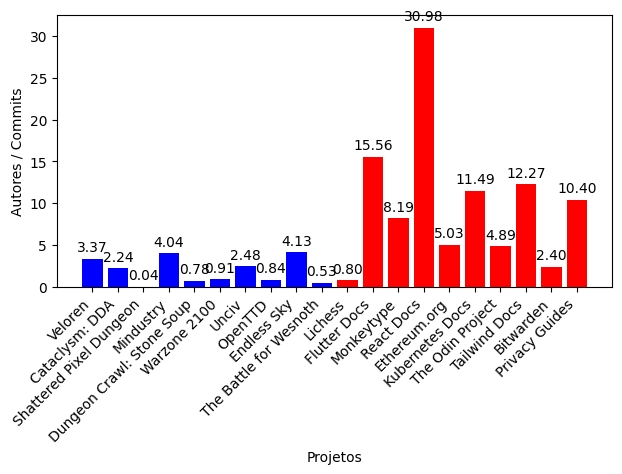

In [99]:
all_author_ratios = np.concatenate((game_author_ratios, web_author_ratios))
x = np.arange(len(all_labels))

fig, ax = plt.subplots()
bar_colors = ['red' if project in web_projects else 'blue' for project in all_labels]

rects = ax.bar(x, all_author_ratios, color=bar_colors, label='Autores / Commits')

# Adicionando rótulos, título e legenda
ax.set_xlabel('Projetos')
ax.set_ylabel('Autores / Commits')
ax.set_xticks(x)
ax.set_xticklabels(all_labels, rotation=45, ha='right')

# Função para adicionar rótulos às barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

In [94]:
for repo in web_commits:
    commits = []
    for commit in repo:
        if commit.committer.name == 'GitHub':
            commits.append(commit.msg)
    print(commits[:10])

['add user profile text links with @ mentions\n\nnot just URLs\r\n\r\nfixes #1986\r\n\r\nnote that the profile link regex is ran after, otherwise the url regex would catch urls added by the profile link regex pass, so the order is kinda specific here', 'Merge pull request #1987 from ornicar/addUserProfileLinks-to-profiles\n\nadd user profile text links with @ mentions', 'translate tooltip of happy icon', 'translate kid mode in sidebar', 'translate kid mode in title and hover tip of happy', 'Merge pull request #1988 from ornicar/kidmode-trans\n\nre-localize kid mode translations in hover tooltips of the happy icon and other places', 'Merge pull request #1991 from niklasf/alternative-ports\n\nBring back alternative WS ports for http and https', 'Merge pull request #1992 from niklasf/update-vagrant\n\n[UNTESTED] Update Vagrantfile with recent config changes', 'Merge pull request #1994 from niklasf/fix-master-game-import\n\nFix import of master games', 'add direct link from slack message']

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [96]:
web_commit_dates = []
for repo in web_commits:
    commit_dates = []
    for commit in repo:
        commit_dates.append(commit.committer_date)
    web_commit_dates.append(commit_dates)